In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#In order to install tflite-model-maker, it seems its best to set the environment to python 3.8

So run this cell below and select the numerical value that corresponds to 3.8

In [ ]:
!sudo update-alternatives --config python3

In [9]:
! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
! chmod +x miniconda.sh
! bash ./miniconda.sh -b -f -p /usr/local
! rm miniconda.sh
! conda config --add channels conda-forge
! conda install -y mamba
! mamba update -qy --all
! mamba clean -qafy
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')

--2023-05-30 04:01:09--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103553755 (99M) [application/x-sh]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>]  98.76M   236MB/s    in 0.4s    

2023-05-30 04:01:10 (236 MB/s) - ‘miniconda.sh’ saved [103553755/103553755]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Pyth

In [5]:
!python --version

Python 3.8.10


In [11]:
!pip install -r "https://raw.githubusercontent.com/dfunkapostal/Aquarium-Shrimp-Detection/main/requirements.txt"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ignoring tensorflow-hub: markers 'python_version < "3"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60

Install tflite-model-maker

In [ ]:
!pip install tflite-model-maker-nightly
!pip install -q pycocotools
!pip install numpy==1.23.5

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)


set spec this can either be efficientdet_lite0 efficientdet_lite1,efficientdet_lite2,efficientdet_lite3,efficientdet_lite4
![image.png](attachment:12d0648b-da1e-4d14-9625-9e99da79c898.png)

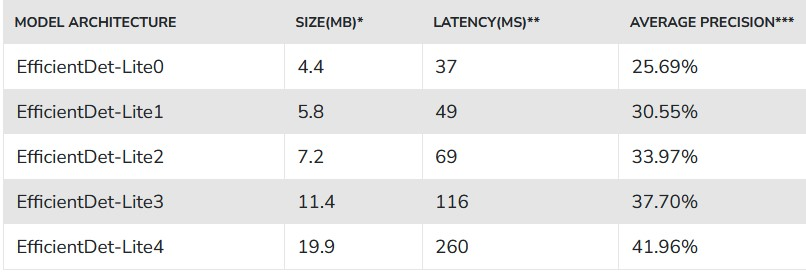

In [ ]:
spec = model_spec.get('efficientdet_lite4')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tflite_model_maker import object_detector
from tflite_model_maker.object_detector import DataLoader

# Define the root directory path
root_dir = '/content/drive/MyDrive/v8voc-asd/'

# Define the paths to the train, test, and valid directories
train_dir = root_dir + 'train'
test_dir = root_dir + 'test'
valid_dir = root_dir + 'valid'

# Define the label map for your dataset
label_map = {
    1: "BGalaxyPintoB",
    2: "BlueBolt",
    3: "CRS-CBS",
    4: "FancyTigerB",
    5: "KingKongB",
    6: "Neo-Caridina",
    7: "OETB",
    8: "PandaB",
    9: "RGalaxyPintoB",
    10: "RacoonTigerB",
    11: "ShadowMosura",
    12: "TangerineTigerB",
    13: "WhiteGoldenB"
}

# Create the data loader for the train dataset
train_data_loader = DataLoader.from_pascal_voc(
    images_dir=train_dir,
    annotations_dir=train_dir,
    label_map=label_map

)

# Create the data loader for the test dataset
test_data_loader = DataLoader.from_pascal_voc(
    images_dir=test_dir,
    annotations_dir=test_dir,
    label_map=label_map
)

# Create the data loader for the valid dataset
valid_data_loader = DataLoader.from_pascal_voc(
    images_dir=valid_dir,
    annotations_dir=valid_dir,
    label_map=label_map
)

# Use the data loaders for further processing or trainin


In [ ]:
# Train the model
model = object_detector.create(
    train_data=train_data_loader,
    model_spec=spec,
    epochs=50,
    batch_size=8,
    train_whole_model=True,
    validation_data=valid_data_loader
)

# Evaluate the model on the test dataset
evaluation = model.evaluate(test_data_loader)

# Use the trained model for inference or further tasks


Epoch 1/50
1248/2928 [===========>..................] - ETA: 35:21 - det_loss: 0.8116 - cls_loss: 0.5907 - box_loss: 0.0044 - reg_l2_loss: 0.1113 - loss: 0.9229 - learning_rate: 0.0084 - gradient_norm: 4.3454

ResourceExhaustedError: Graph execution error:

Detected at node 'BoxLoss/huber_loss/mul_1' defined at (most recent call last):
    File "/opt/conda/envs/py38/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/envs/py38/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/envs/py38/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/opt/conda/envs/py38/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/opt/conda/envs/py38/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_1401/2590249131.py", line 2, in <module>
      model = object_detector.create(
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/core/task/object_detector.py", line 260, in create
      object_detector.train(train_data, validation_data, epochs, batch_size)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/core/task/object_detector.py", line 123, in train
      return self.model_spec.train(self.model, train_ds, steps_per_epoch,
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/core/task/model_spec/object_detector_spec.py", line 265, in train
      model.fit(
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/third_party/efficientdet/keras/train_lib.py", line 766, in train_step
      det_loss = self._detection_loss(cls_outputs, box_outputs, labels,
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/third_party/efficientdet/keras/train_lib.py", line 700, in _detection_loss
      box_loss_layer([num_positives_sum, box_targets_at_level],
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/tensorflow_examples/lite/model_maker/third_party/efficientdet/keras/train_lib.py", line 557, in call
      box_loss = tf.cast(self.huber(box_targets, box_outputs),
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/envs/py38/lib/python3.8/site-packages/keras/losses.py", line 1701, in huber
      delta * abs_error - half * tf.square(delta)),
Node: 'BoxLoss/huber_loss/mul_1'
failed to allocate memory
	 [[{{node BoxLoss/huber_loss/mul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_349046]

In [ ]:
model.export(export_dir='.')